<center><h1>Random walk and self-avoiding random walk</h1></center>

# 2-D Random Walk - the usual way

A 2-D normal Random Walk is propagated in a 2-D(x-y) plane. It consists of motion in 4 directions i.e.all of Up-Down-Left-Right. Espescially the walker is allowed to come back to points already visited.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA
from scipy.optimize import curve_fit

In [2]:
class ClassicalRandomWalk:
    
    # Constructor for setting up the grid
    def __init__(self, size_grid, start_pos):
        
        # pos for storing the coordinates of the position of the walker in a size_gridx2 matrix
        self.__pos = np.zeros((size_grid+1,2)) 

        # Set initial start position
        self.__pos[0][0] = start_pos[0]  
        self.__pos[0][1] = start_pos[1]
        
        # We assume four directions of movement
        self.__direction = ["NORTH", "SOUTH", "EAST", "WEST"]
    
    def x_positions(self):
        return self.__pos[:, 0]
    
    def y_positions(self):
        return self.__pos[:, 1]
        
    def simulate_walk(self, steps): 
        for i in range(1,steps+1):
            # Randomly choosing the direction of movement
            step = random.choice(self.__direction)
            # Updating the direction with respect to the direction of motion choosen
            if step == "EAST": 
                self.__pos[i] = [self.__pos[i-1][0] + 1, self.__pos[i-1][1]]
            elif step == "WEST": 
                self.__pos[i] = [self.__pos[i-1][0] - 1, self.__pos[i-1][1]]
            elif step == "NORTH": 
                self.__pos[i] = [self.__pos[i-1][0], self.__pos[i-1][1] + 1]
            else: 
                self.__pos[i] = [self.__pos[i-1][0], self.__pos[i-1][1] - 1]
        
        return self.__pos[steps][:]
    
    def plot_trajectory(self):
        plt.title("Random Walk 2-D")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.plot(self.x_positions(), self.y_positions()) 
        plt.show()

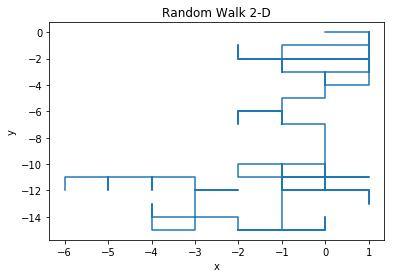

In [3]:
# the number of steps we want to simulate, so increase the value of n increses the complexity of the shown graph
steps = 100

# Run the simulation and plot the results.
classical_random_walk = ClassicalRandomWalk(steps, [0,0])
classical_random_walk.simulate_walk(steps)
classical_random_walk.plot_trajectory()

In [4]:
# Calculation of the mean squared displacement (MSD) depending on the number of steps n

# number of timesteps
num_timesteps = 50

# Number of simulations being done for the given timestep
num_trajectories = 10000

msd = np.zeros(num_timesteps)

for timestep in range(1,num_timesteps+1):
    
    # Array for caching the L2-norm squared of the 
    # end point of each trajectory being simulated
    msd_single_ensemble = np.zeros(num_trajectories)
    
    # Calculate the ensemble mean for the actual timestep
    for i in range(num_trajectories):
        classical_random_walk = ClassicalRandomWalk(timestep, [0,0])
        end_pos_n = classical_random_walk.simulate_walk(timestep)
        msd_single_ensemble[i] = LA.norm(end_pos_n, 2)**2
        
    msd[timestep-1] = 1. / num_trajectories * np.sum(msd_single_ensemble) 

alpha =  1.0000600393786885  +/-  1.4027382715189104e-07


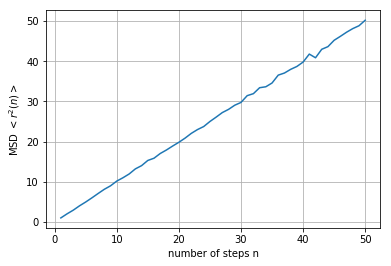

In [5]:
# Plot the dependency between number of timesteps and MSD
plt.plot(np.arange(1,num_timesteps+1), msd)
plt.xlabel('number of steps n')
plt.ylabel('MSD $<r^2(n)>$')
plt.grid()

popt, pcov = curve_fit(lambda x,a:x**a, np.arange(1,num_timesteps+1), msd)
print("alpha = " , float(popt), " +/- ", float(pcov))

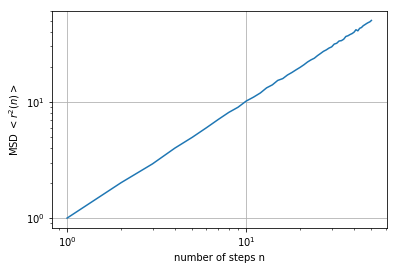

In [6]:
# Plot the above dependency in a log-log-scale
plt.plot(np.arange(1,num_timesteps+1), msd)
plt.xlabel('number of steps n')
plt.ylabel('MSD $<r^2(n)>$')
plt.xscale('log')
plt.yscale('log')
plt.grid()

# 2-D Random walk - the self-avoiding random walk (SAW)

In the so-called self-avoiding random walk (SAW), the walker is not allowed to do so and hence does not cross its own path.

In [7]:
class SelfAvoidingRandomWalk:
    
    # Constructor for setting up the grid
    def __init__(self, size_grid, start_pos):
        
        # size of the grid on which the random walk is performed
        self.__size_grid = size_grid + 1;
        
        # pos for storing the coordinates of the position of the walker in a size_gridx2 matrix
        self.__pos = np.zeros((self.__size_grid,2)) 

        # Set initial start position
        self.__pos[0][0] = start_pos[0]  
        self.__pos[0][1] = start_pos[1]
        
        # We assume four directions of movement
        self.__direction = ["NORTH", "SOUTH", "EAST", "WEST"]
    
        # For the self avoiding Random Walk we introduce a grid for checking if node already has been visited.
        self.__visited_pos = np.zeros((size_grid+1, size_grid+1))
        
        # Mark initial start position node as visited
        self.__visited_pos[int(self.__pos[0][0])][int(self.__pos[0][1])] = 1
        
    def x_positions(self):
        return self.__pos[:, 0]
    
    def y_positions(self):
        return self.__pos[:, 1]
        
    def simulate_walk(self, steps): 
        for i in range(1, steps+1):
            check_validity = self.simulation_step(i)
            if (check_validity == False):
                # Reset all arrays 
                self.__pos = np.zeros((self.__size_grid,2)) 
                self.__visited_pos = np.zeros((self.__size_grid, self.__size_grid))
                
                # Restart computation
                self.simulate_walk(steps)
                
        return self.__pos[steps][:]
    
    def simulation_step(self, step_num):
        
        #Flag in order to check if node has already been visited
        step_positive = False
        
        # Array for identify dead streets and restart computation
        dead_end = np.zeros(4);
        
        while(step_positive == False):
            # Randomly choosing the direction of movement
            step = random.choice(self.__direction)
            # Updating the direction with respect to the direction of motion choosen
            if step == "EAST":
                if(self.__visited_pos[int(self.__pos[step_num-1][0] + 1)][int(self.__pos[step_num-1][1])] == 0):
                    self.__pos[step_num] = [self.__pos[step_num-1][0] + 1, self.__pos[step_num-1][1]]

                    self.__visited_pos[int(self.__pos[step_num-1][0] + 1)][int(self.__pos[step_num-1][1])] = 1
                    step_positive = True
                else:
                    dead_end[0] = 1

            elif step == "WEST": 
                if(self.__visited_pos[int(self.__pos[step_num-1][0] - 1)][int(self.__pos[step_num-1][1])] == 0):
                    self.__pos[step_num] = [self.__pos[step_num-1][0] - 1, self.__pos[step_num-1][1]]

                    self.__visited_pos[int(self.__pos[step_num-1][0] - 1)][int(self.__pos[step_num-1][1])] = 1
                    step_positive = True
                else:
                    dead_end[1] = 1

            elif step == "NORTH":
                if(self.__visited_pos[int(self.__pos[step_num-1][0])][int(self.__pos[step_num-1][1] + 1)] == 0):
                    self.__pos[step_num] = [self.__pos[step_num-1][0], self.__pos[step_num-1][1] + 1]

                    self.__visited_pos[int(self.__pos[step_num-1][0])][int(self.__pos[step_num-1][1] + 1)] = 1
                    step_positive = True
                else:
                    dead_end[2] = 1
            else:
                if(self.__visited_pos[int(self.__pos[step_num-1][0])][int(self.__pos[step_num-1][1] - 1)] == 0):
                    self.__pos[step_num] = [self.__pos[step_num-1][0], self.__pos[step_num-1][1] - 1]

                    self.__visited_pos[int(self.__pos[step_num-1][0])][int(self.__pos[step_num-1][1] - 1)] = 1
                    step_positive = True
                else:
                    dead_end[3] = 1

            # Check whether we land in a dead_end
            if((dead_end == 1).all() == True): 
                return False
        
        # Simulation step succeed
        return True
        
    def plot_trajectory(self):
        plt.title("Random Walk 2-D")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.plot(self.x_positions(), self.y_positions()) 
        plt.show()

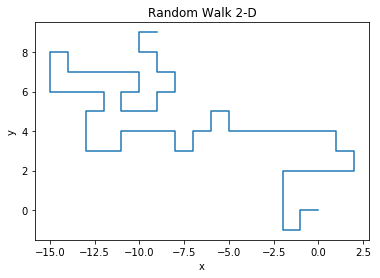

In [8]:
# the number of steps we want to simulate, so increase the value of n increases the complexity of the shown graph
steps = 60;

# Run the simulation and plot the results.
self_avoiding_random_walk = SelfAvoidingRandomWalk(steps, [0,0])
self_avoiding_random_walk.simulate_walk(steps)
self_avoiding_random_walk.plot_trajectory()

In [9]:
# Calculation of the mean squared displacement (MSD) depending on the number of steps n

# number of timesteps
num_timesteps = 10

# Number of simulations being done for the given timestep
num_trajectories = 1500

msd = np.zeros(num_timesteps)

for timestep in range(1,num_timesteps+1):
    
    # Array for caching the L2-norm squared of the 
    # end point of each trajectory being simulated
    msd_single_ensemble = np.zeros(num_trajectories)
    
    # Calculate the ensemble mean for the actual timestep
    for i in range(num_trajectories):
        self_avoiding_random_walk = SelfAvoidingRandomWalk(timestep, [0,0])
        end_pos_n = self_avoiding_random_walk.simulate_walk(timestep)
        msd_single_ensemble[i] = LA.norm(end_pos_n, 2)**2
        
    msd[timestep-1] = 1. / num_trajectories * np.sum(msd_single_ensemble) 

alpha =  1.3423752826087423  +/-  1.1830030562571881e-05


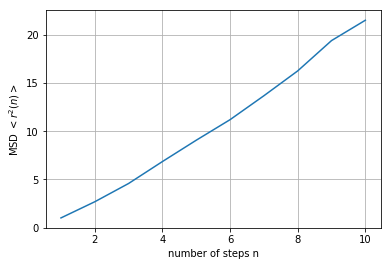

In [10]:
# Plot the dependency between number of timesteps and MSD
plt.plot(np.arange(1,num_timesteps+1), msd)
plt.xlabel('number of steps n')
plt.ylabel('MSD $<r^2(n)>$')
plt.grid()

popt, pcov = curve_fit(lambda x,a:x**a, np.arange(1,num_timesteps+1), msd)
print("alpha = " , float(popt), " +/- ", float(pcov))

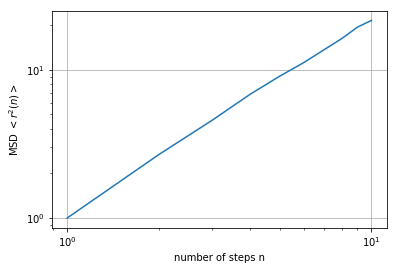

In [11]:
# Plot the above dependency in a log-log-scale
plt.plot(np.arange(1,num_timesteps+1), msd)
plt.xlabel('number of steps n')
plt.ylabel('MSD $<r^2(n)>$')
plt.xscale('log')
plt.yscale('log')
plt.grid()

# Summary

As we see, the exponent for the classsical random walk is $\alpha = 1$, which corresponds to a normal diffusion process. 

For the self avoiding random walk the exponent is $\alpha = 1.34$, which corrseponds to a superdiffusion process. So probably, a self avoiding random walk is a good way to model a superdiffusion process.

The higher exponent for the self avoiding random walk is also quite obvious, since a particle must diffuse away faster.